In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

credit_df = pd.read_csv("C:/Users/USER/Documents/UPX_learning_files/Machine_learning/Case Studies/Logistic_Regression/Logistic_Regression_Credit_Default.csv")

In [2]:
credit_df.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [4]:
credit_df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


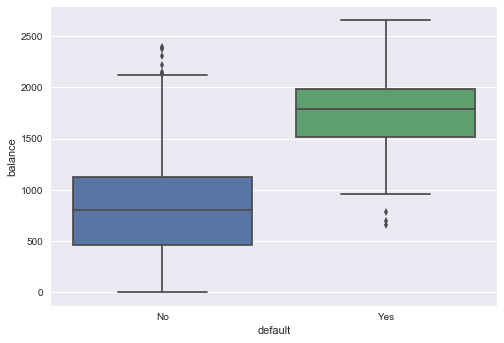

In [5]:
sns.boxplot(x='default', y='balance', data= credit_df)

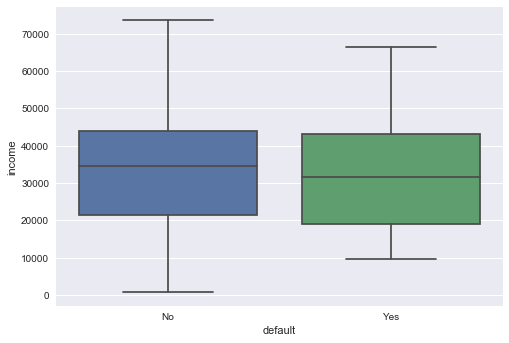

In [6]:
sns.boxplot(x='default', y='income', data= credit_df)

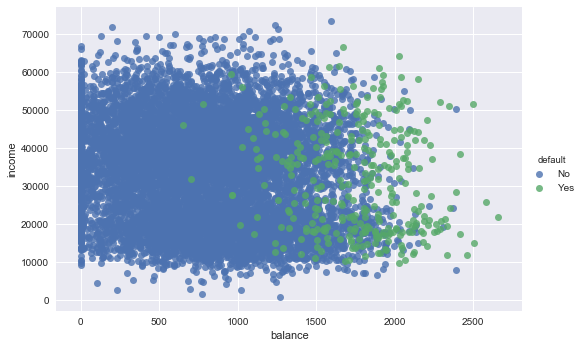

In [7]:
sns.lmplot(x='balance', y='income', hue = 'default', data= credit_df, aspect=1.5, ci= None, fit_reg =False)

In [8]:
pd.crosstab(credit_df['default'], credit_df['student'])

student,No,Yes
default,,
No,6850,2817
Yes,206,127


In [9]:
default_dummy = pd.get_dummies(credit_df.default, prefix='default')
default_dummy.drop('default_No', axis=1,  inplace= True)
credit_df = pd.concat([credit_df, default_dummy], axis = 1)

credit_df.head()

,default,student,balance,income,default_Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


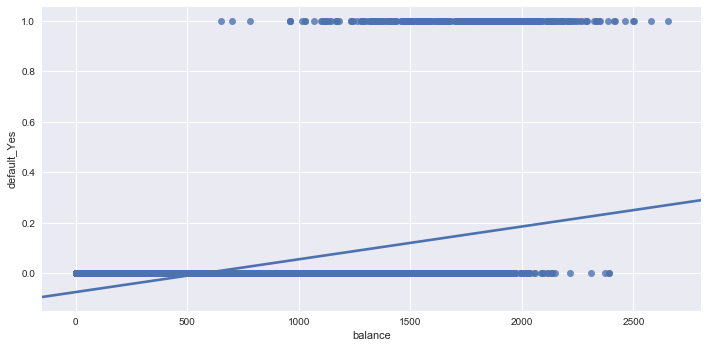

In [10]:
sns.lmplot(x='balance', y='default_Yes', data = credit_df, aspect =2, ci= None, fit_reg = True)

In [11]:
#Building Regression Model
from sklearn.linear_model import LinearRegression

X = credit_df[['balance']]
y = credit_df['default_Yes']

linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.coef_)
print(linreg.intercept_)

[ 0.00012987]
-0.0751919588462


In [12]:
#Building logistic regression model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e42) #Setting a large value for low regularization
logreg.fit(X, y)

print(logreg.coef_)
print(logreg.intercept_)

y_pred = logreg.predict_proba(X)


[[ 0.00530412]]
[-10.32691114]


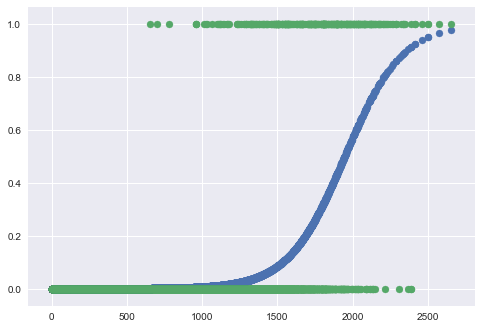

In [13]:
plt.scatter(X.values, y_pred[:,1])
plt.scatter(X.values, y)
plt.show()

In [14]:
logreg.predict_proba(5000)

array([[  9.27173084e-08,   9.99999907e-01]])

In [15]:
#Creating logistic model

credit_df = pd.get_dummies(credit_df, columns=["student"])
#X = credit_df.drop('default',1)
#y = credit_df['default']

In [23]:
feature_cols = ['balance','student_Yes']
X = credit_df[feature_cols]
y = credit_df.default

In [24]:
credit_df.head(5)

,default,balance,income,default_Yes,student_No,student_Yes
0,No,729.526495,44361.625074,0,1,0
1,No,817.180407,12106.134700,0,0,1
2,No,1073.549164,31767.138947,0,1,0
3,No,529.250605,35704.493935,0,1,0
4,No,785.655883,38463.495879,0,1,0


In [25]:
#splitting the data into train and test with 70:30 ratio
from sklearn.cross_validation import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30)

In [26]:
#calling logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=.1)

In [27]:
#fitting the model with x and y attributes of train data
#in this it is going to learn the pattern
logreg.fit(xTrain, yTrain)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
#now applying our learnt model on test and also ontrain data
y_log_pred_test = logreg.predict(xTest)
y_log_pred_train = logreg.predict(xTrain)

In [29]:
#comparing the metrics of predicted label and real label of test data
metrics.accuracy_score(yTest, y_log_pred_test)

0.96166666666666667

In [30]:
#comparing the metrics of predicted label and real label of test data
metrics.accuracy_score(yTrain, y_log_pred_train)

0.96957142857142853

In [43]:
feature_cols = ['balance','student_Yes']
X = credit_df[feature_cols]
y = credit_df.default

Spec1 = 0

balance = input("Enter customer balance:")
student = input("Is the customer a student?:")

balance = float(balance)


if student == 'yes':
    Spec1 = 1
    
else: 
    Spec1 = 0
        
X = [balance, Spec1]
#the threshold is automatically 
print('Will the customer default?', logreg.predict(X))

Enter customer balance:2000
Is the customer a student?:yes
Will the customer default? ['No']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
